http://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/


https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://tomaugspurger.github.io/modern-7-timeseries

http://willgeary.github.io/data/2016/05/18/when-does-crime-happen-in-new-york-city.html

https://github.com/samitchaudhuri/analyze-subway
http://earthpy.org/pandas-basics.html

http://nbviewer.jupyter.org/github/koldunovn/earthpy.org/blob/master/content/earthpy_pandas_basics.ipynb

https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import json

In [2]:
df = pd.DataFrame()
for x in glob.glob('*.XLSX'):
    df1 = pd.read_excel(x)
    df = pd.concat([df,df1])

In [3]:
df.Local.unique()

array(['Av. Brig. Faria Lima', 'R. Vergueiro'], dtype=object)

In [4]:
df.dtypes

Local              object
Sentido            object
Data       datetime64[ns]
Horário            object
Qtde.               int64
dtype: object

In [5]:
df['Data'] = df['Data'].astype(str)
df['Horário'] = df['Horário'].astype(str)
df['Date'] = df['Data']+' '+df['Horário']
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
total = df[df.Sentido == 'Total']

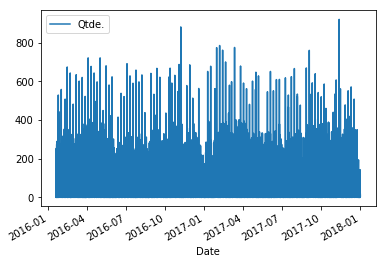

In [6]:
total.plot()

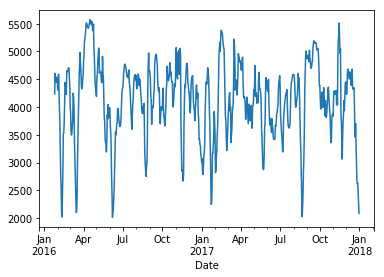

In [7]:
#média de 7 dias
total.resample('D').sum()['Qtde.'].rolling(7).mean().plot()

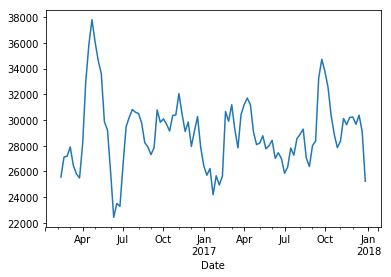

In [8]:
#média de 4 semanas
total.resample('W').sum()['Qtde.'].rolling(4).mean().plot()

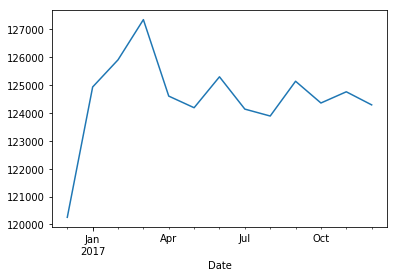

In [9]:
total.resample('M').sum()['Qtde.'].rolling(12).mean().plot()

#### Clima (tempo e temperatura)

In [10]:
clima_json = open('/Users/main/Dropbox/Novelo/codigos/Novelo/Clima_Json/08ff4b0a5a3b3a7593745d3f8169a63c.json', 'r')

In [11]:
clima_sp = json.load(clima_json)

#### Dia da Semana

#### Feriado

#### Ciclofaixas abertas

Quais as horas do dia com mais e menos ciclistas?
https://stackoverflow.com/questions/17706109/summing-the-number-of-occurrences-per-day-pandas

In [12]:
total_pivot = total.reset_index().pivot_table(index='Date', columns='Local', values='Qtde.',fill_value=0)

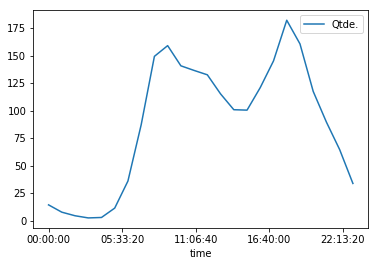

In [13]:
total.groupby(total.index.time).mean().plot()

In [14]:
faria_lima = df[df.Local == 'Av. Brig. Faria Lima']

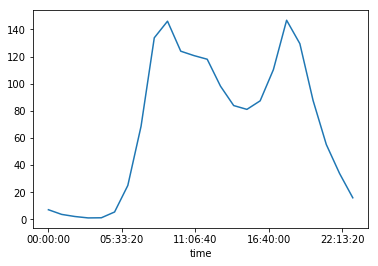

In [15]:
faria_lima.groupby(faria_lima.index.time).mean()['Qtde.'].plot()

In [16]:
vergueiro = df[df.Local == 'R. Vergueiro']

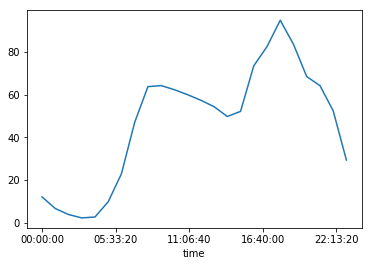

In [17]:
vergueiro.groupby(vergueiro.index.time).mean()['Qtde.'].plot()

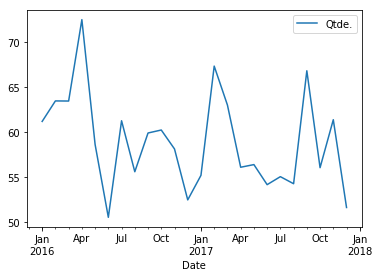

In [18]:
df.resample('M').mean().plot()

Heatmap relacionando hora e mês
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [19]:
import seaborn as sns; sns.set()

Em casa mês, quais são as horas com mais e menos ciclistas?

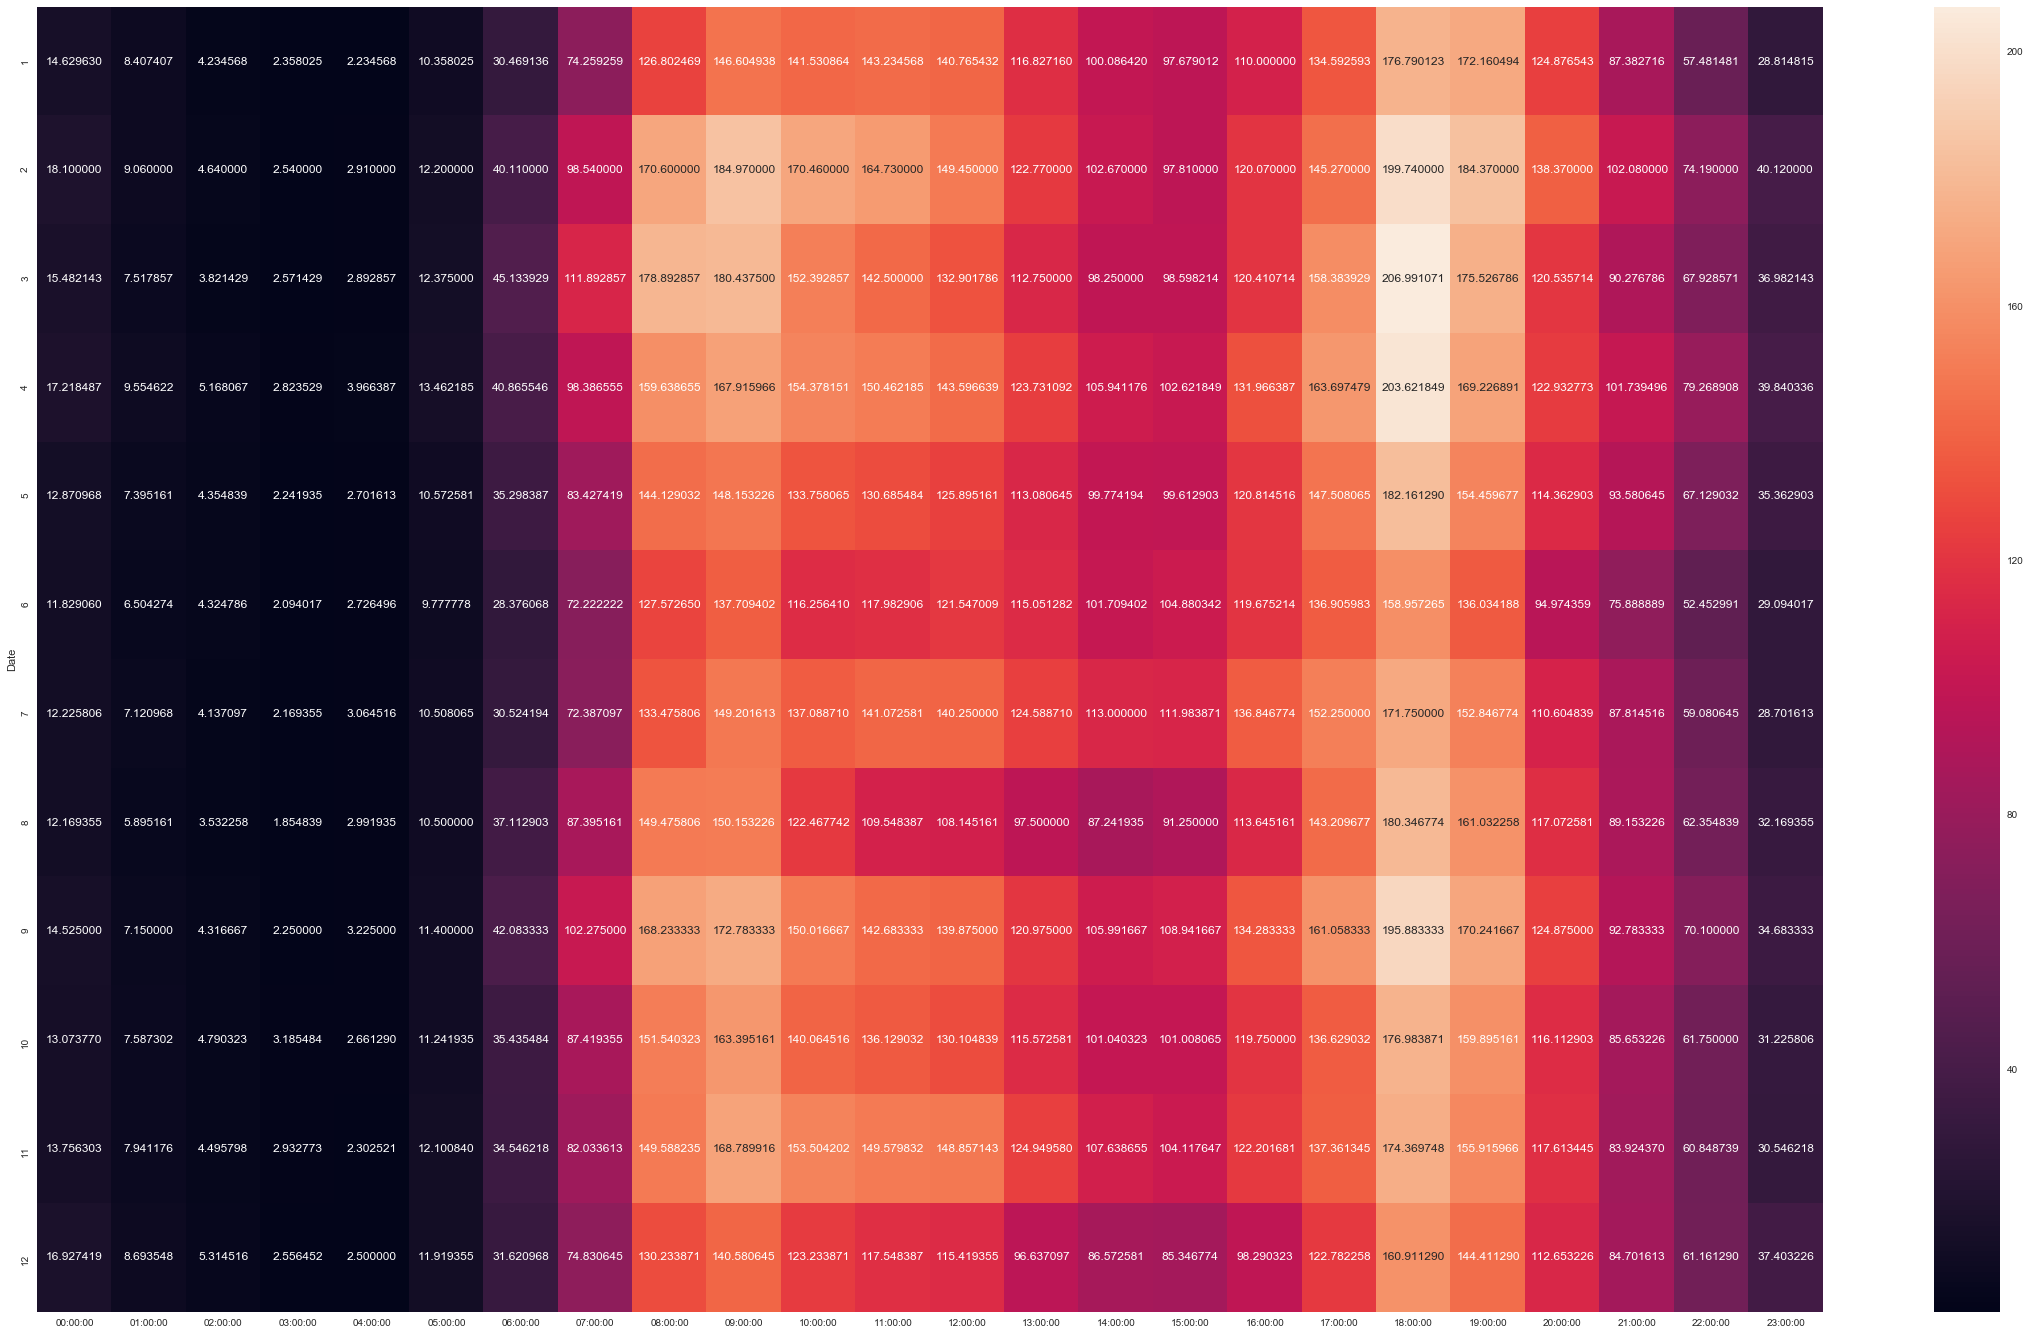

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 24)
heatmap_bike = sns.heatmap(total.pivot_table(values='Qtde.', aggfunc='mean', index=total.index.month, columns=total.index.time), annot=True,fmt='f')
fig.savefig('heatmap_bike.jpeg')

E se considerássemos todos os dias do ano?

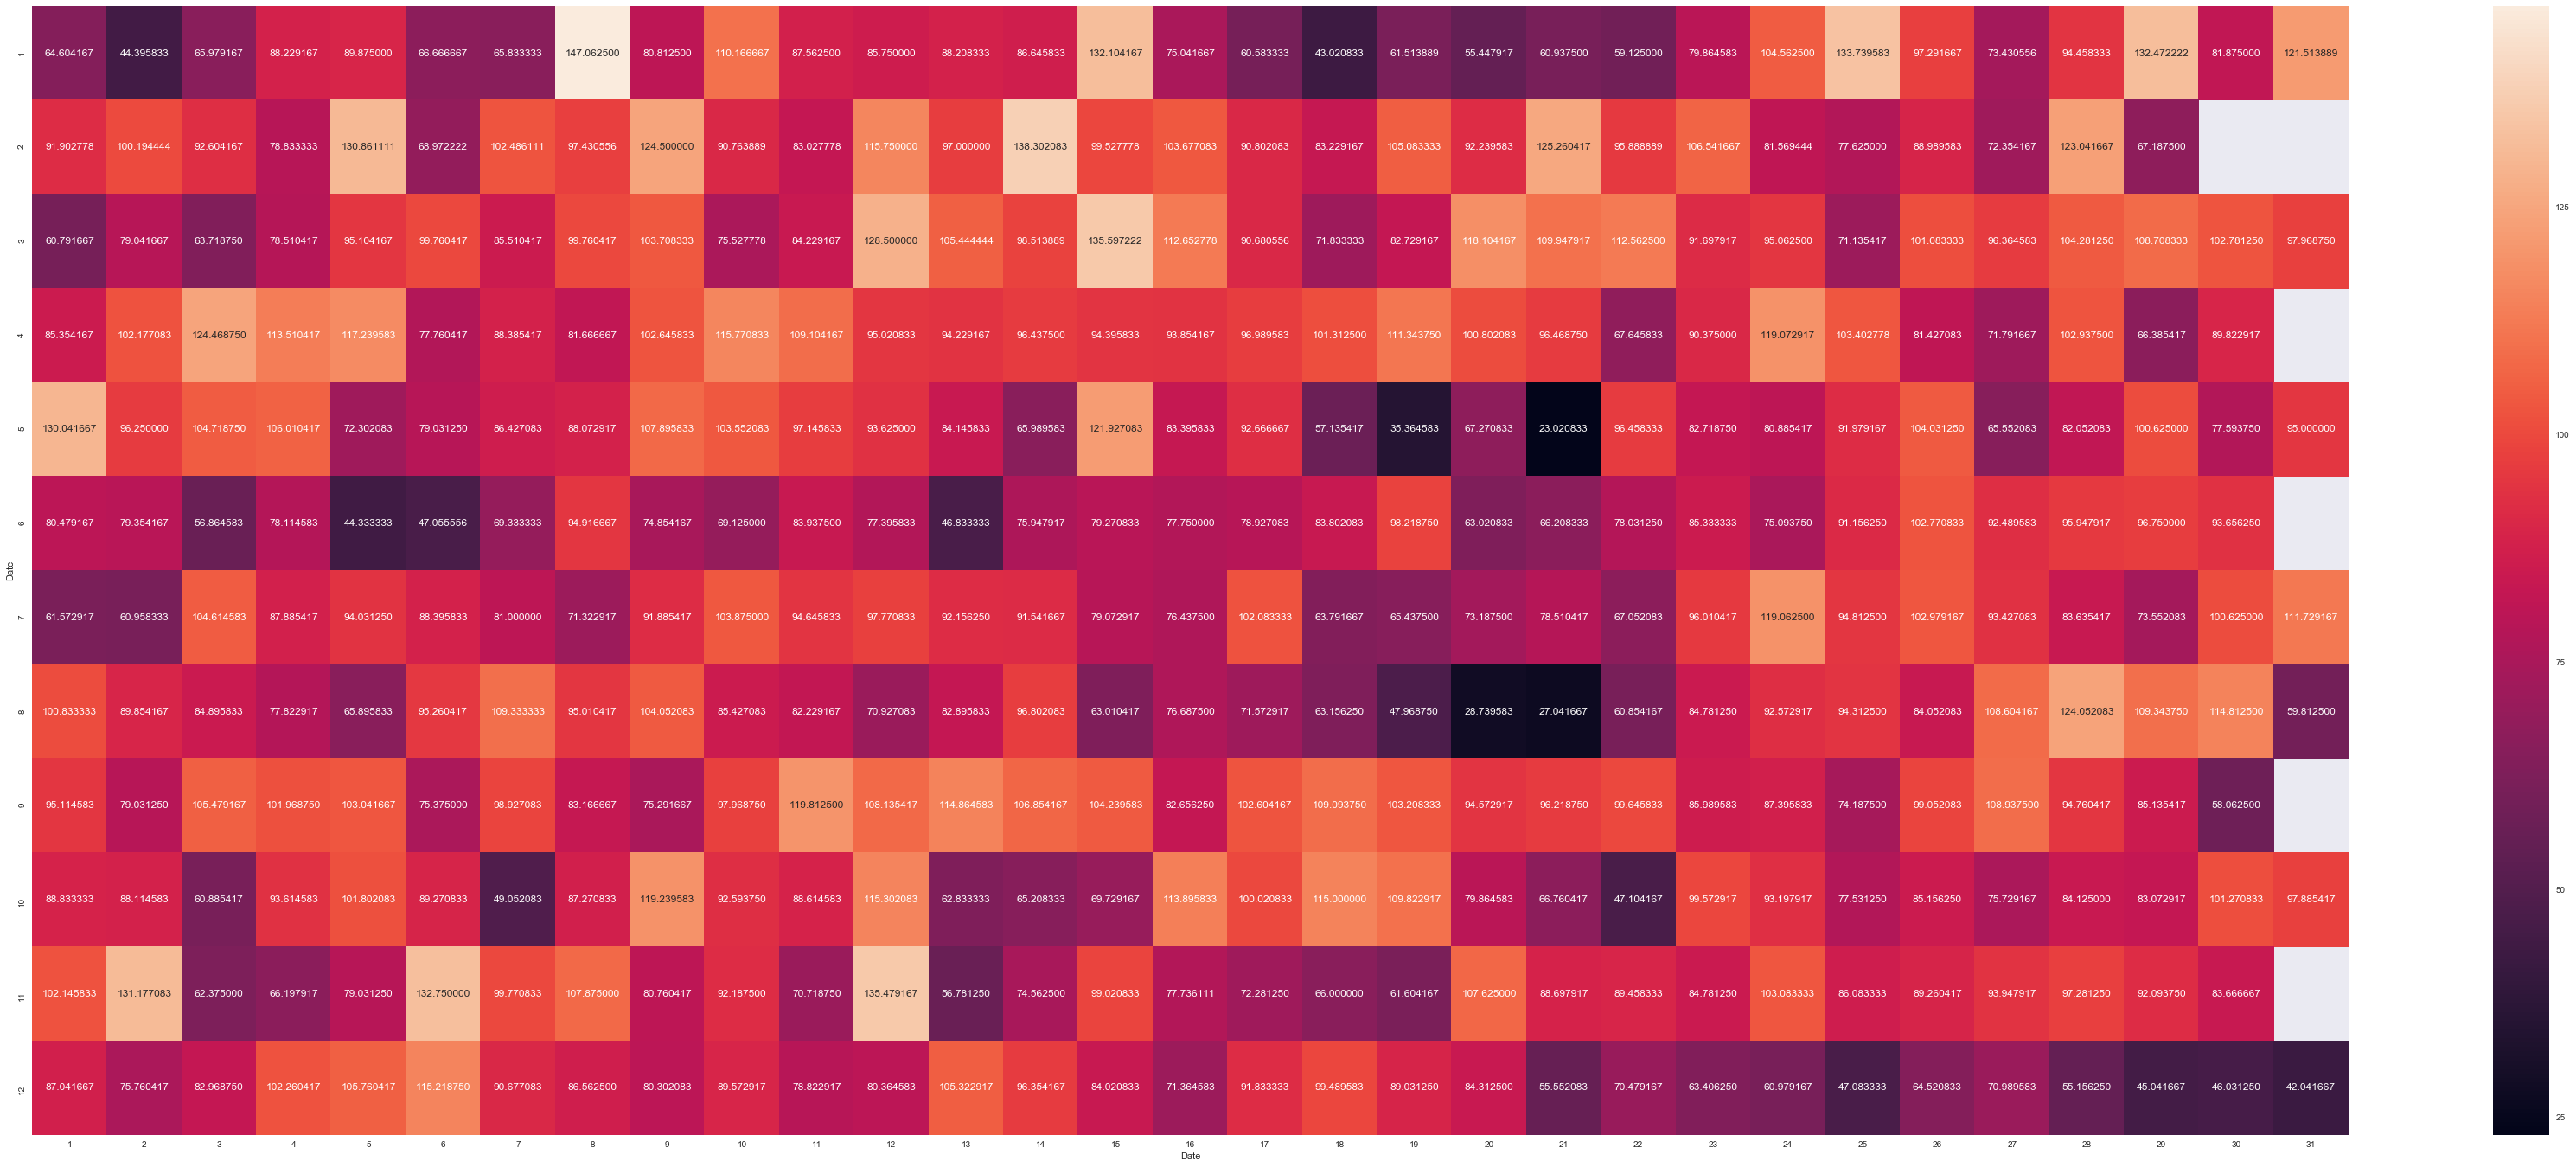

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(60, 24)
heatmap_bike = sns.heatmap(total.pivot_table(values='Qtde.', aggfunc='mean', index=total.index.month, columns=total.index.day), annot=True,fmt='f')
fig.savefig('heatmap_dias.jpeg')